### Resources

[Getting started with pandas](http://pandas.pydata.org/pandas-docs/stable/)

[10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)

[Visualization with pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

[Pandas Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#cookbook)

# pandas

`pandas` is designed to make it easier to work with structured data. 

Most of the analyses you might perform will likely involve using tabular data, e.g., from .csv files or relational databases (e.g., SQL) 

The `DataFrame` object in `pandas` is "a two-dimensional tabular, column-oriented data structure with both row and column labels."

If you're curious:

>The `pandas` name itself is derived from *panel data*, an econometrics term for multidimensional structured data sets (data where observations are both per time and per individual), and *Python data analysis* itself. After getting introduced, you can consult the full [`pandas` documentation](http://pandas.pydata.org/pandas-docs/stable/).


[Pandas](http://pandas.pydata.org/) is a package of fast, efficient data analysis tools for Python.

Its popularity has surged in recent years, coincident with the rise
of fields such as data science and machine learning.

Here’s a popularity comparison over time against STATA, SAS, and [dplyr](https://dplyr.tidyverse.org/) courtesy of Stack Overflow Trends

<img src="https://s3-ap-southeast-2.amazonaws.com/python-programming.quantecon.org/_static/lecture_specific/pandas/pandas_vs_rest.png" style="width:55%;height:55%">

  
Just as [NumPy](http://www.numpy.org/) provides the basic array data type plus core array operations, pandas

1. defines fundamental structures for working with data and  
1. endows them with methods that facilitate operations such as  
  
  - reading in data  
  - adjusting indices  
  - working with dates and time series  
  - sorting, grouping, re-ordering and general data munging <sup><a href=#mung id=mung-link>[1]</a></sup>  
  - dealing with missing values, etc., etc.  
  


More sophisticated statistical functionality is left to other packages, such
as [statsmodels](http://www.statsmodels.org/) and [scikit-learn](http://scikit-learn.org/), which are built on top of pandas.

This lecture will provide a basic introduction to pandas.

Throughout the lecture, we will assume that the following imports have taken
place

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Series


<a id='index-2'></a>
Two important data types defined by pandas are  `Series` and `DataFrame`.

You can think of a `Series` as a “column” of data, such as a collection of observations on a single variable.

A `DataFrame` is an object for storing related columns of data.

Let’s start with Series

In [6]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0    0.289217
1    0.465931
2    1.101335
3   -0.802456
Name: daily returns, dtype: float64

Here you can imagine the indices `0, 1, 2, 3` as indexing four listed
companies, and the values being daily returns on their shares.

Pandas `Series` are built on top of NumPy arrays and support many similar
operations

In [7]:
s * 100

0     28.921690
1     46.593140
2    110.133518
3    -80.245569
Name: daily returns, dtype: float64

In [8]:
np.abs(s)

0    0.289217
1    0.465931
2    1.101335
3    0.802456
Name: daily returns, dtype: float64

But `Series` provide more than NumPy arrays.

Not only do they have some additional (statistically oriented) methods

In [9]:
s.describe()

count    4.000000
mean     0.263507
std      0.791595
min     -0.802456
25%      0.016299
50%      0.377574
75%      0.624782
max      1.101335
Name: daily returns, dtype: float64

But their indices are more flexible

In [10]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN    0.289217
AAPL    0.465931
MSFT    1.101335
GOOG   -0.802456
Name: daily returns, dtype: float64

Viewed in this way, `Series` are like fast, efficient Python dictionaries
(with the restriction that the items in the dictionary all have the same
type—in this case, floats).

In fact, you can use much of the same syntax as Python dictionaries

In [11]:
# Checking  by index
print('AAPL' in s)
# Changing value by str index
print(s['AMZN'])
s['AMZN'] = 0
s

True
0.2892168998615985


AMZN    0.000000
AAPL    0.465931
MSFT    1.101335
GOOG   -0.802456
Name: daily returns, dtype: float64

## DataFrames


<a id='index-3'></a>
While a `Series` is a single column of data, a `DataFrame` is several columns, one for each variable.

In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet.

Thus, it is a powerful tool for representing and analyzing data that are naturally organized  into rows and columns, often with  descriptive indexes for individual rows and individual columns.

Let’s look at an example that reads data from the CSV file `pandas/data/test_pwt.csv` that can be downloaded
<a href=_static/lecture_specific/pandas/data/test_pwt.csv download>here</a>.

Here’s the content of `test_pwt.csv`

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
print(type(df))
df.head(3)

<class 'pandas.core.frame.DataFrame'>


,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.99950,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.72483,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.94160,1.728144e+06,64.575551,14.072206


We can select particular rows using standard Python array slicing notation

In [4]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


Note that this **cares about the index** so if the index of the dataframe was strings (or anything else than ordered integers) **you may get surprises**

To select columns, we can pass a list containing the names of the desired columns represented as strings

In [5]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


To select both rows and columns using integers, the `iloc` attribute should be used with the format `.iloc[rows, columns]`

In [6]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


# .loc : your best friend

To select rows and columns using a mixture of integers and labels, the `loc` attribute can be used in a similar way

In [7]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


In [8]:
df.loc[df.POP >= 10_000]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454


### Selecting on multiple conditions

The `&` (and), `|` (or), `~` (not) can be used to combine queries:

In [10]:
df.loc[
    (df.POP >= 10_000)
    & (df.year >= 2000)
]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454


More complex:

In [11]:
df.loc[
    (df.POP >= 10_000)
    & (
        ~(df.year < 2000)
        | (df.cc < 70)
    )
]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454


Let’s imagine that we’re only interested in population (`POP`) and total GDP (`tcgdp`).

One way to strip the data frame `df` down to only these variables is to overwrite the dataframe using the selection method described above

In [16]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


Here the index `0, 1,..., 7` is redundant because we can use the country names as an index.

To do this, we set the index to be the `country` variable in the dataframe

In [17]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


Changing column names:

In [21]:
df.columns = ['population', 'total GDP']
df.head(2)

,population,total GDP
country,,
Argentina,37335.653,295072.21869
Australia,19053.186,541804.65210


Population is in thousands, let’s revert to single units

In [22]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


Next, we’re going to add a column showing real GDP per capita, multiplying by 1,000,000 as we go because total GDP is in millions

In [23]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


One of the nice things about pandas `DataFrame` and `Series` objects is that they have methods for plotting and visualization that work through Matplotlib.

For example, we can easily generate a bar plot of GDP per capita

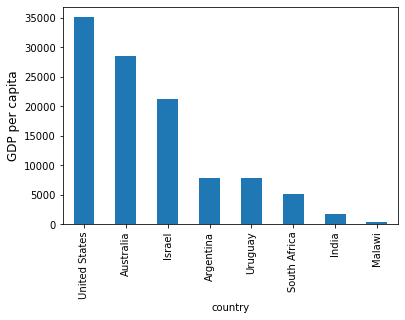

In [27]:
ax = df['GDP percap'].plot(kind='bar')
# Set y labels
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

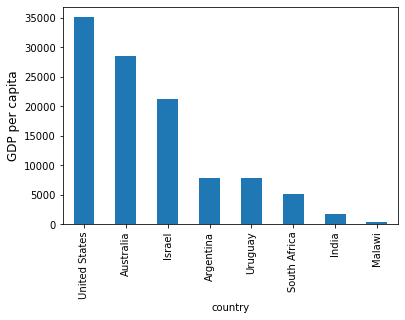

In [26]:
# Plot ascending
# First sort
df = df.sort_values(by='GDP percap', ascending=False)
# Not plot
ax = df['GDP percap'].plot(kind='bar')
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

# Read CSV

The `read_csv()` function in `pandas` allows us to easily import our data. By default, it assumes the data is comma-delimited. However, you can specify the delimiter used in your data (e.g., tab, semicolon, pipe, etc.). There are several parameters that you can specify. See the documentation [here](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html). `read_csv()` returns a `DataFrame`.


In [3]:
unemployment = pd.read_csv('data/country_total.csv')
unemployment

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9
...,...,...,...,...,...
20791,uk,trend,2010.06,2429000,7.7
20792,uk,trend,2010.07,2422000,7.7
20793,uk,trend,2010.08,2429000,7.7
20794,uk,trend,2010.09,2447000,7.8


You've created a `pandas` `DataFrame`. We can look at our data by using the `.head()` method. By default, this shows the header (column names) and the first five rows. Passing an integer, $n$, to `.head()` returns that number of rows. To see the last $n$ rows, use `.tail()`.

To find the number of rows, you can use the `len()` function. Alternatively, you can use the `shape` attribute.

A useful method that generates various summary statistics is `.describe()`.

In [4]:
print(unemployment.shape)
unemployment.describe()

(20796, 5)


,month,unemployment,unemployment_rate
count,20796.000000,2.079600e+04,19851.000000
mean,1999.401290,7.900818e+05,8.179764
std,7.483751,1.015280e+06,3.922533
min,1983.010000,2.000000e+03,1.100000
25%,1994.090000,1.400000e+05,5.200000
50%,2001.010000,3.100000e+05,7.600000
75%,2006.010000,1.262250e+06,10.000000
max,2010.120000,4.773000e+06,20.900000


You may have noticed that the "count" is lower for the unemployment rate. This is because the summary statistics are based on *non-missing* values and count reflects that.

The values depend on what it's called on. If the `DataFrame` includes both numeric and object (e.g., strings) `dtype`s, it will default to summarizing the numeric data. If `.describe()` is called on strings, for example, it will return the count, number of unique values, and the most frequent value along with its count.

# Importing from URL

Above, we imported the unemployment data using the `read_csv` function and a relative file path. `read_csv` is [a very flexible method](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.read_csv.html); it also allows us to import data using a URL as the file path. 

A csv file with data on world countries and their abbreviations is located at [https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv](https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv) (saved as a string variable `countries_url` below).

Using `read_csv`, import the country data and save it to the variable `countries`.

In [7]:
countries_url = 'https://raw.githubusercontent.com/dlab-berkeley/introduction-to-pandas/master/data/countries.csv'

countries = pd.read_csv(countries_url)
countries.sample(2)

,country,google_country_code,country_group,name_en,name_fr,name_de,latitude,longitude
22,pt,PT,eu,Portugal,Portugal,Portugal,39.558069,-7.844941
23,ro,RO,eu,Romania,Roumanie,Rumänien,45.942611,24.990152


### Exercise: Describe `countries`

It's important to understand a few fundamentals about your data before you start work with it, including what information it contains, how large it is, and how the values are generally distributed.

Using the methods and attributes above, answer the following questions about `countries`:
* what columns does it contain?
* what does each row stand for?
* how many rows and columns does it contain?
* are there any missing values in the latitude or longitude columns? 

Hint: the `head` and `describe` functions, as well as the `shape` attribute, will be helpful here.

In [ ]:
### Answers

# What columns does it contain?
print(countries.columns)

# Each row stands for a single country

# How many rows and columns does it contain?
print(countries.shape)

# Are there any missing values in the latitude or longitude columns?
countries.describe()

## Rename, Index, and Slice
Back to the entire unemployment data set. You may have noticed that the `month` column also includes the year. Let's go ahead and rename it.

In [8]:
unemployment.head(3)

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4


In [10]:
unemployment.rename(columns={'month' : 'year_month'})

,country,seasonality,year_month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6
2,at,nsa,1993.03,166000,4.4
3,at,nsa,1993.04,157000,4.1
4,at,nsa,1993.05,147000,3.9
...,...,...,...,...,...
20791,uk,trend,2010.06,2429000,7.7
20792,uk,trend,2010.07,2422000,7.7
20793,uk,trend,2010.08,2429000,7.7
20794,uk,trend,2010.09,2447000,7.8


# A Warning: Pandas methods create new dataframes by default

Notice right now that the `.rename()` function returned a dataframe!

If we look at `unemployment` it's unchanged:

In [12]:
unemployment.head(2)

,country,seasonality,month,unemployment,unemployment_rate
0,at,nsa,1993.01,171000,4.5
1,at,nsa,1993.02,175000,4.6


To fix this, the common pattern is to assign the dataframe to the result of its method:

In [13]:
unemployment = unemployment.rename(columns={'month' : 'year_month'})

Some methods also have an `inplace` parameter, but this is considered to be **bad practice** and discouraged by the pandas developpers. Just use the re-assignment pattern instead